# Create Dataset

In [16]:
import json

with open('datasets/vdo.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

data["result"][0]

{'_id': '5d0916af66b04b724e36c767',
 'url_mp4': '/mam/sqrtube/cqep9V/ติ่งหู.mp4',
 'thumbnail': '/mam/sqrtube/cqep9V/thumbnail.png',
 'orig_file': 'ติ่งหู.mp4',
 'transcode360': 'Off',
 'url_m3u8': '/mam/sqrtube/cqep9V/index.m3u8',
 'vid': 'cqep9V',
 'urlmp4_360': '/mam/sqrtube/cqep9V/360MP4/ติ่งหู.mp4',
 'content_path': '/opt/lixen/dev/mam/sqrtube/cqep9V/',
 'createdAt': '2019-06-18T23:51:59Z',
 'urlmp4_480': '/mam/sqrtube/cqep9V/480MP4/ติ่งหู.mp4',
 'transcode240': 'success',
 'expire_date': '18-06-2572',
 'transcode720MP4': 'Off',
 'transcode720': 'success',
 'transcode480MP4': 'success',
 'owner': 'ttrs',
 'transcode360MP4': 'Off',
 'transcode240MP4': 'Off',
 'transcode480': 'success',
 'updatedAt': '2019-06-18T23:52:37Z',
 'urlmp4_240': '/mam/sqrtube/cqep9V/240MP4/ติ่งหู.mp4',
 'urlmp4_720': '/mam/sqrtube/cqep9V/720MP4/ติ่งหู.mp4',
 'duration': '3.900000',
 'catagory_id': '5d01f816c13a110aca7ac835',
 'category': 'ร่างกายภายนอก',
 'downloadStatus': 'false',
 'videoIdSakod': '5d0916

In [ ]:
import os
import cv2
import json
from tqdm.auto import tqdm
from unidecode import unidecode
from PIL import Image

video_folder = "datasets/vdo"
output_base_folder = "datasets/set_2"
os.makedirs(output_base_folder, exist_ok=True)

output_metadata_file = "datasets/set_2/original_image.json"
output_summary_file = "datasets/set_2/summary.txt"
metadata = []
summary = {
    "processed_videos": 0,
    "skipped_videos": 0,
    "video_details": {},
    "skipped_details": []
}

def normalize_name(name):
    normalized = unidecode(name).replace(" ", "_")
    return normalized

def process_image(image_path):
    """ทำการ crop และ resize ภาพ"""
    img = Image.open(image_path)
    width, height = img.size
    if width > height:
        left = (width - height) // 2
        right = left + height
        top, bottom = 0, height
    else:
        top = (height - width) // 2
        bottom = top + width
        left, right = 0, width

    img = img.crop((left, top, right, bottom))
    img = img.resize((512, 512), Image.Resampling.LANCZOS)
    return img

for item in tqdm(data["result"], desc="Processing videos", unit="video"):
    video_id = item["_id"]
    video_name = normalize_name(item["name"].strip())

    if "creator" not in item or not item["creator"].strip():
        summary["skipped_videos"] += 1
        summary["skipped_details"].append({
            "video_id": video_id,
            "video_name": item["name"],
            "reason": "Missing creator"
        })
        continue

    creator_name = normalize_name(item["creator"].strip())
    video_path = os.path.join(video_folder, f'{video_id}_{item["orig_file"]}')
    if os.path.isfile(video_path):
        summary["processed_videos"] += 1
        summary["video_details"].setdefault(creator_name, {"count": 0, "videos": []})
        summary["video_details"][creator_name]["count"] += 1
        summary["video_details"][creator_name]["videos"].append(video_name)

        creator_folder = os.path.join(output_base_folder, creator_name)
        os.makedirs(creator_folder, exist_ok=True)
        name_folder = os.path.join(creator_folder, video_name, "image")
        os.makedirs(name_folder, exist_ok=True)
        cap = cv2.VideoCapture(video_path)
        frame_count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            temp_frame_path = "temp_frame.jpg"
            cv2.imwrite(temp_frame_path, frame)
            processed_img = process_image(temp_frame_path)
            frame_filename = os.path.join(name_folder, f"{video_id}_{frame_count:04d}.jpg")
            processed_img.save(frame_filename)
            metadata.append({
                "frame_path": frame_filename,
                "creator": item["creator"],
                "gender": item.get("gender", "unknown"),
                "name": item["name"],
                "frame_index": frame_count
            })
            frame_count += 1
        cap.release()
    else:
        summary["skipped_videos"] += 1
        summary["skipped_details"].append({
            "video_id": video_id,
            "video_name": item["name"],
            "reason": "Video file not found"
        })

with open(output_metadata_file, "w", encoding="utf-8") as f:
    json.dump(metadata, f, ensure_ascii=False, indent=4)

with open(output_summary_file, "w", encoding="utf-8") as f:
    f.write("=== Summary ===\n")
    f.write(f"Processed videos: {summary['processed_videos']}\n")
    f.write(f"Skipped videos: {summary['skipped_videos']}\n")
    f.write("Details per creator:\n")
    for creator, details in summary["video_details"].items():
        f.write(f"  {creator}: {details['count']} video(s)\n")
    f.write("\nSkipped videos:\n")
    for skipped in summary["skipped_details"]:
        f.write(f"  Video ID: {skipped['video_id']}, Name: {skipped['video_name']}, Reason: {skipped['reason']}\n")

print(f"บันทึก metadata สำเร็จที่ {output_metadata_file}")
print(f"บันทึก summary สำเร็จที่ {output_summary_file}")

Processing videos:   0%|          | 0/5048 [00:00<?, ?video/s]

# Conditioning Image

In [2]:
import json

with open('datasets/set_1/original_image.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

data[0]

{'frame_path': 'datasets/set_1/naangsaawchwaalaa_ecchriywngsaiphsaal/tinghuu/image/5d0916af66b04b724e36c767_0000.jpg',
 'creator': 'นางสาวชวาลา เจริญวงศ์ไพศาล',
 'gender': 'หญิง',
 'name': 'ติ่งหู',
 'frame_index': 0}

In [3]:
import pandas as pd

df = pd.DataFrame(data)
df['creator'] = df['creator'].str.replace(r'\t', '', regex=True).str.strip()
df['creator'].value_counts()

creator
นายธนูเกียรติ ลอยประโคน       89747
กาญจนา พิมพา                  65813
นางสาวชวาลา เจริญวงศ์ไพศาล    38878
ธนูเกียรติ ลอยประโคน          26601
นางสาวกาญจนา พิมพา            23465
นางสาวนภารัตน์ รุ่มนุ่ม        1359
ทดสอบ                           219
นายวีรภัทร ชูพรหมแก้ว            85
นายนูเกียรติ ลอยประโคน           84
นายสุทธิพงษ์ สุคำหล้า            66
Name: count, dtype: int64

In [4]:
df['creator'] = df['creator'].str.replace(r'^(นาย|นางสาว)', '', regex=True).str.strip()
df['creator'] = df['creator'].replace('นูเกียรติ ลอยประโคน', 'ธนูเกียรติ ลอยประโคน')
unique_creators = df['creator'].unique()
mapping = {name: f"TTRS{i+1}" for i, name in enumerate(unique_creators)}
df['name'] = df['creator'].map(mapping)
df

,frame_path,creator,gender,name,frame_index
0,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,ชวาลา เจริญวงศ์ไพศาล,หญิง,TTRS1,0
1,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,ชวาลา เจริญวงศ์ไพศาล,หญิง,TTRS1,1
2,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,ชวาลา เจริญวงศ์ไพศาล,หญิง,TTRS1,2
3,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,ชวาลา เจริญวงศ์ไพศาล,หญิง,TTRS1,3
4,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,ชวาลา เจริญวงศ์ไพศาล,หญิง,TTRS1,4
...,...,...,...,...,...
246312,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,ธนูเกียรติ ลอยประโคน,ชาย,TTRS2,61
246313,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,ธนูเกียรติ ลอยประโคน,ชาย,TTRS2,62
246314,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,ธนูเกียรติ ลอยประโคน,ชาย,TTRS2,63
246315,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,ธนูเกียรติ ลอยประโคน,ชาย,TTRS2,64


In [5]:
unique_creators = df['creator'].unique()
mapping = {name: f"TTRS{i+1}" for i, name in enumerate(unique_creators)}

for creator, ttrs in mapping.items():
    print(f"{creator} -> {ttrs}")

ชวาลา เจริญวงศ์ไพศาล -> TTRS1
ธนูเกียรติ ลอยประโคน -> TTRS2
ทดสอบ -> TTRS3
วีรภัทร ชูพรหมแก้ว -> TTRS4
สุทธิพงษ์ สุคำหล้า -> TTRS5
กาญจนา พิมพา -> TTRS6
นภารัตน์ รุ่มนุ่ม -> TTRS7


In [1]:
from flux.controlnet_aux import OpenposeDetector

open_pose = OpenposeDetector.from_pretrained("base_model/Annotators")
open_pose.to("cuda")

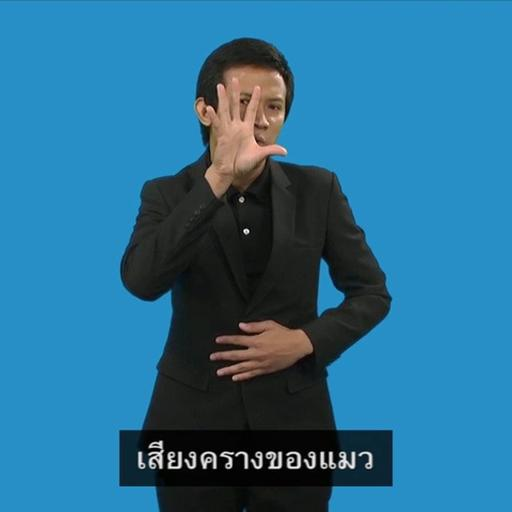

In [19]:
from diffusers.utils import load_image
from PIL import Image

# img = load_image(data[1]['frame_path'])
img = load_image("datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/esiiyngkhraangkh`ngaemw/image/5d09bb1c66b04b724e371878_0078.jpg")
# img = load_image("datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/phllaphth/image/62ea1e3866b04b724eaafe5b_0026.jpg")
img = img.resize((512, 512), Image.Resampling.LANCZOS)
img

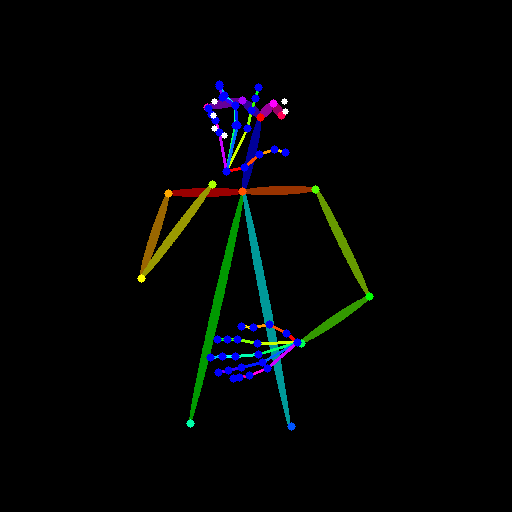

In [20]:
control_image, left_hands, right_hands = open_pose(img, hand_and_face=True)
control_image

In [21]:
common_keypoints = set(left_hands[0]) & set(right_hands[0])

print(len(set(left_hands[0])), len(set(right_hands[0])))
common_keypoints

21 20


set()

In [22]:
left_hands

[[Keypoint(x=0.5800781, y=0.66796875, score=1.0, id=-1),
  Keypoint(x=0.55859375, y=0.6503906, score=1.0, id=-1),
  Keypoint(x=0.5253906, y=0.6328125, score=1.0, id=-1),
  Keypoint(x=0.49414062, y=0.6386719, score=1.0, id=-1),
  Keypoint(x=0.47070312, y=0.63671875, score=1.0, id=-1),
  Keypoint(x=0.5019531, y=0.6699219, score=1.0, id=-1),
  Keypoint(x=0.46289062, y=0.6621094, score=1.0, id=-1),
  Keypoint(x=0.44335938, y=0.6621094, score=1.0, id=-1),
  Keypoint(x=0.42382812, y=0.6621094, score=1.0, id=-1),
  Keypoint(x=0.50390625, y=0.69140625, score=1.0, id=-1),
  Keypoint(x=0.45898438, y=0.6953125, score=1.0, id=-1),
  Keypoint(x=0.43359375, y=0.6953125, score=1.0, id=-1),
  Keypoint(x=0.41015625, y=0.6972656, score=1.0, id=-1),
  Keypoint(x=0.51171875, y=0.70703125, score=1.0, id=-1),
  Keypoint(x=0.47070312, y=0.7167969, score=1.0, id=-1),
  Keypoint(x=0.4453125, y=0.72265625, score=1.0, id=-1),
  Keypoint(x=0.42578125, y=0.7265625, score=1.0, id=-1),
  Keypoint(x=0.5214844, y=0.71

In [23]:
right_hands

[[Keypoint(x=0.44140625, y=0.33398438, score=1.0, id=-1),
  Keypoint(x=0.4765625, y=0.32617188, score=1.0, id=-1),
  Keypoint(x=0.5058594, y=0.30078125, score=1.0, id=-1),
  Keypoint(x=0.53515625, y=0.29101562, score=1.0, id=-1),
  Keypoint(x=0.5566406, y=0.296875, score=1.0, id=-1),
  Keypoint(x=0.48242188, y=0.25, score=1.0, id=-1),
  Keypoint(x=0.49023438, y=0.21484375, score=1.0, id=-1),
  Keypoint(x=0.49804688, y=0.19140625, score=1.0, id=-1),
  Keypoint(x=0.50390625, y=0.16992188, score=1.0, id=-1),
  Keypoint(x=0.45898438, y=0.24414062, score=1.0, id=-1),
  Keypoint(x=0.45898438, y=0.20507812, score=1.0, id=-1),
  Keypoint(x=0.4375, y=0.18554688, score=1.0, id=-1),
  Keypoint(x=0.42773438, y=0.1640625, score=1.0, id=-1),
  Keypoint(x=0.46289062, y=0.24414062, score=1.0, id=-1),
  Keypoint(x=0.45898438, y=0.20507812, score=1.0, id=-1),
  Keypoint(x=0.43359375, y=0.18945312, score=1.0, id=-1),
  Keypoint(x=0.42773438, y=0.16796875, score=1.0, id=-1),
  Keypoint(x=0.42773438, y=0.2

In [ ]:
from diffusers.utils import load_image
from tqdm.auto import tqdm
import os
import json

output_json_file = "datasets/set_2/conditioning_metadata.json"
conditioning_metadata = []

for idx in tqdm(range(df.shape[0]), desc="Processing conditioning images", unit="image"):
    save_path = df['frame_path'][idx].replace("image", "conditioning_image").replace("set_1", "set_2")
    conditioning_folder = save_path.split("conditioning_image")[0] + "conditioning_image"
    os.makedirs(conditioning_folder, exist_ok=True)
    if not os.path.exists(save_path) or os.path.getsize(save_path) < 1:
        if os.path.exists(save_path) and os.path.getsize(save_path) < 1:
            print(f"File {save_path} is smaller than 1B, regenerating...")
        img = load_image(df['frame_path'][idx])
        control_image, left_hands, right_hands = open_pose(img, hand_and_face=True)
        if len(left_hands) != 0 and len(right_hands) != 0:
            control_image.save(save_path)
            conditioning_metadata.append({
                "image": df['frame_path'][idx],
                "conditioning_image": save_path,
                "text": f"{df['name'][idx]}, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background."
            })

with open(output_json_file, "w", encoding="utf-8") as f:
    json.dump(conditioning_metadata, f, ensure_ascii=False, indent=4)

print(f"บันทึก conditioning metadata สำเร็จที่ {output_json_file}")

Processing conditioning images:   0%|          | 0/246317 [00:00<?, ?image/s]

# Split Datasets

In [3]:
import json

with open('datasets/set_2/conditioning_metadata.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

len(data)

246309

In [4]:
data[0]

{'image': 'datasets/set_1/naangsaawchwaalaa_ecchriywngsaiphsaal/tinghuu/image/5d0916af66b04b724e36c767_0000.jpg',
 'conditioning_image': 'datasets/set_2/naangsaawchwaalaa_ecchriywngsaiphsaal/tinghuu/conditioning_image/5d0916af66b04b724e36c767_0000.jpg',
 'text': 'TTRS1, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.'}

In [5]:
import pandas as pd

df = pd.DataFrame(data)
df

,image,conditioning_image,text
0,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
1,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
2,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
3,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
4,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
...,...,...,...
246304,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ch...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."
246305,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ch...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."
246306,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ch...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."
246307,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ch...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."


In [7]:
import os

df["exists"] = df["conditioning_image"].apply(lambda x: os.path.exists(x))
df = df[df["exists"]].drop(columns=["exists"]).reset_index(drop=True)
df

,image,conditioning_image,text
0,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
1,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
2,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
3,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
4,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
...,...,...,...
246304,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ch...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."
246305,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ch...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."
246306,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ch...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."
246307,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ch...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ch...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."


In [4]:
from sklearn.model_selection import train_test_split

test_ratio = 0.1

train_data, test_data = train_test_split(
    df, test_size=test_ratio, stratify=df['text'], random_state=42
)

print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 221685
Test size: 24632


In [5]:
train_data.to_json('datasets/set_1/train_data.json', orient='records', force_ascii=False, indent=4)
test_data.to_json('datasets/set_1/test_data.json', orient='records', force_ascii=False, indent=4)

# Sub Datasets

In [10]:
import json

with open('datasets/set_2/test_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

len(data)

24631

In [11]:
data[0]

{'image': 'datasets/set_1/naangsaawchwaalaa_ecchriywngsaiphsaal/rthbangkhabwithyu/image/5d0b468966b04b724e38096b_0063.jpg',
 'conditioning_image': 'datasets/set_2/naangsaawchwaalaa_ecchriywngsaiphsaal/rthbangkhabwithyu/conditioning_image/5d0b468966b04b724e38096b_0063.jpg',
 'text': 'TTRS1, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.'}

In [12]:
import pandas as pd

df = pd.DataFrame(data)
df

,image,conditioning_image,text
0,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
1,datasets/set_1/kaaycchnaa_phimphaa/mhaawithyaa...,datasets/set_2/kaaycchnaa_phimphaa/mhaawithyaa...,"TTRS6, Thai man, mid-30s, black suit, dark blu..."
2,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/la...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/la...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."
3,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/wi...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/wi...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."
4,datasets/set_1/kaaycchnaa_phimphaa/kamair/imag...,datasets/set_2/kaaycchnaa_phimphaa/kamair/cond...,"TTRS6, Thai man, mid-30s, black suit, dark blu..."
...,...,...,...
24626,datasets/set_1/naangsaawkaaycchnaa_phimphaa/lu...,datasets/set_2/naangsaawkaaycchnaa_phimphaa/lu...,"TTRS6, Thai man, mid-30s, black suit, dark blu..."
24627,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai man, mid-30s, black suit, dark blu..."
24628,datasets/set_1/thnuuekiiyrti_l`ypraokhn/sabepl...,datasets/set_2/thnuuekiiyrti_l`ypraokhn/sabepl...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."
24629,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ka...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ka...,"TTRS2, Thai man, mid-30s, black suit, dark blu..."


In [13]:
df['text'].value_counts()

text
TTRS2, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.    11643
TTRS6, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.     8928
TTRS1, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.     3887
TTRS7, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.      136
TTRS3, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.       22
TTRS4, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.        8
TTRS5, Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.        7
Name: count, dtype: int64

In [14]:
df['name'] = df['text'].str.replace(', Thai man, mid-30s, black suit, dark blue shirt, showing sign language, light blue background.', '')
df['name'].value_counts()

name
TTRS2    11643
TTRS6     8928
TTRS1     3887
TTRS7      136
TTRS3       22
TTRS4        8
TTRS5        7
Name: count, dtype: int64

In [15]:
set(df['name'].values)

{'TTRS1', 'TTRS2', 'TTRS3', 'TTRS4', 'TTRS5', 'TTRS6', 'TTRS7'}

In [16]:
def replace_gender(text, name):
    if name in ["TTRS1", "TTRS6", "TTRS7"]:
        return text.replace("man", "woman")
    return text

df["text"] = df.apply(lambda row: replace_gender(row["text"], row["name"]), axis=1)
df

,image,conditioning_image,text,name
0,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai woman, mid-30s, black suit, dark b...",TTRS1
1,datasets/set_1/kaaycchnaa_phimphaa/mhaawithyaa...,datasets/set_2/kaaycchnaa_phimphaa/mhaawithyaa...,"TTRS6, Thai woman, mid-30s, black suit, dark b...",TTRS6
2,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/la...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/la...,"TTRS2, Thai man, mid-30s, black suit, dark blu...",TTRS2
3,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/wi...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/wi...,"TTRS2, Thai man, mid-30s, black suit, dark blu...",TTRS2
4,datasets/set_1/kaaycchnaa_phimphaa/kamair/imag...,datasets/set_2/kaaycchnaa_phimphaa/kamair/cond...,"TTRS6, Thai woman, mid-30s, black suit, dark b...",TTRS6
...,...,...,...,...
24626,datasets/set_1/naangsaawkaaycchnaa_phimphaa/lu...,datasets/set_2/naangsaawkaaycchnaa_phimphaa/lu...,"TTRS6, Thai woman, mid-30s, black suit, dark b...",TTRS6
24627,datasets/set_1/naangsaawchwaalaa_ecchriywngsai...,datasets/set_2/naangsaawchwaalaa_ecchriywngsai...,"TTRS1, Thai woman, mid-30s, black suit, dark b...",TTRS1
24628,datasets/set_1/thnuuekiiyrti_l`ypraokhn/sabepl...,datasets/set_2/thnuuekiiyrti_l`ypraokhn/sabepl...,"TTRS2, Thai man, mid-30s, black suit, dark blu...",TTRS2
24629,datasets/set_1/naaythnuuekiiyrti_l`ypraokhn/ka...,datasets/set_2/naaythnuuekiiyrti_l`ypraokhn/ka...,"TTRS2, Thai man, mid-30s, black suit, dark blu...",TTRS2


In [17]:
names = list(set(df['name'].values))

for _, name in enumerate(names, start=1):
    df_filtered = df[df['name'] == name]
    output_filename = f'datasets/set_2/json_sub_people/test_data_{name}.json'
    df_filtered.to_json(output_filename, orient='records', force_ascii=False, indent=4)
    print(f"บันทึกข้อมูลของ '{name}' ลงในไฟล์ {output_filename}")

บันทึกข้อมูลของ 'TTRS7' ลงในไฟล์ datasets/set_2/json_sub_people/test_data_TTRS7.json
บันทึกข้อมูลของ 'TTRS1' ลงในไฟล์ datasets/set_2/json_sub_people/test_data_TTRS1.json
บันทึกข้อมูลของ 'TTRS6' ลงในไฟล์ datasets/set_2/json_sub_people/test_data_TTRS6.json
บันทึกข้อมูลของ 'TTRS3' ลงในไฟล์ datasets/set_2/json_sub_people/test_data_TTRS3.json
บันทึกข้อมูลของ 'TTRS2' ลงในไฟล์ datasets/set_2/json_sub_people/test_data_TTRS2.json
บันทึกข้อมูลของ 'TTRS4' ลงในไฟล์ datasets/set_2/json_sub_people/test_data_TTRS4.json
บันทึกข้อมูลของ 'TTRS5' ลงในไฟล์ datasets/set_2/json_sub_people/test_data_TTRS5.json
